In [20]:
import librosa
import pandas as pd
import plotly.plotly as py
import IPython.display as ipd
import numpy as np
y, sr = librosa.load("C://Users//Chinmay//Downloads//Bring it on-extract.mp3")
yz_harmonic, yz_percussive = librosa.effects.hpss(y)
for i in range(3) :
    a_harmonic, yz_percussive = librosa.effects.hpss(yz_percussive)

print(sr)
    
ipd.Audio(yz_percussive, rate=2*sr)

22050


In [21]:
x, sr = librosa.load("C://Users//Chinmay//Downloads//Dolby Walya Full Song-extract.mp3")
xz_harmonic, xz_percussive = librosa.effects.hpss(x)
for i in range(3) :
    x_harmonic, xz_percussive = librosa.effects.hpss(xz_percussive)


In [22]:
tempo1, beats1 = librosa.beat.beat_track(y=yz_percussive, sr=sr)
tempo2, beats2 = librosa.beat.beat_track(y=xz_percussive, sr=sr)

In [23]:
sr1= (tempo1/tempo2)*sr
#use time stretch instead


In [24]:
ipd.Audio(yz_percussive, rate=sr)

In [25]:
ipd.Audio(xz_percussive, rate=sr1)

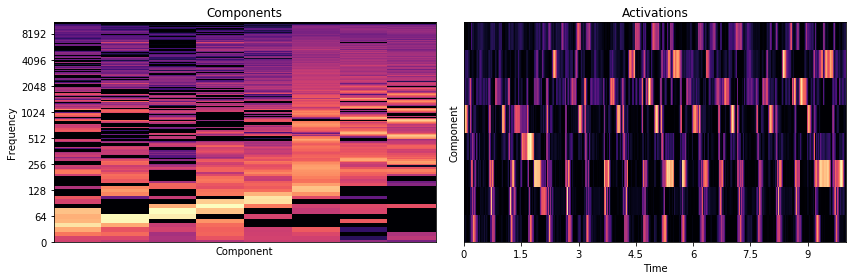

In [26]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
import librosa.display

D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(components), ref=np.max), y_axis='log')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()

In [27]:
corr = np.correlate(yz_percussive, xz_percussive, "fft")

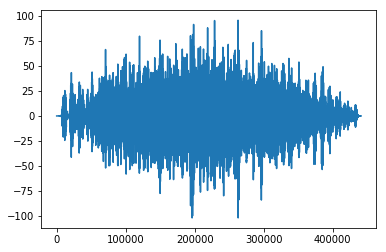

In [28]:
plt.plot(corr)